In [4]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [5]:
G = nx.read_edgelist('M1/edges.csv', delimiter = ',')

In [6]:
# SI function with thresholds
def si_threshold(G, i_nodes, kappa):
   new_infected = i_nodes.copy()
   s_nodes = set(G.nodes) - i_nodes
   for s_node in s_nodes:
      if len(set(G.neighbors(s_node)) & i_nodes) >= kappa:
         new_infected.add(s_node)
   return new_infected

In [9]:
model_curve = defaultdict(lambda : defaultdict(float))
for run in range(10):
   # The seed set should be the same for the different threshold models
   #testing for thershol of 1,2 and 3
   i_nodes_1 = set(random.sample(set(G.nodes), 10))
   i_nodes_2 = i_nodes_1.copy()
   i_nodes_3 = i_nodes_1.copy()
   for step in range(50):
      i_nodes_1 = si_threshold(G, i_nodes_1, 1) 
      i_nodes_2 = si_threshold(G, i_nodes_2, 2)
      i_nodes_3 = si_threshold(G, i_nodes_3, 4)
    
      # Since we run 10 times, we average the infected set size
      model_curve["threshold_1"][step] += (len(i_nodes_1) / len(G.nodes)) / 10
      model_curve["threshold_2"][step] += (len(i_nodes_2) / len(G.nodes)) / 10
      model_curve["threshold_3"][step] += (len(i_nodes_3) / len(G.nodes)) / 10


/var/folders/49/1k50p6kj6d173t0f0hl4h0700000gn/T/ipykernel_47276/134364295.py:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  i_nodes_1 = set(random.sample(set(G.nodes), 10))


from the graph we can se what we need to set the threshold as in order to reach the whole popultaion?

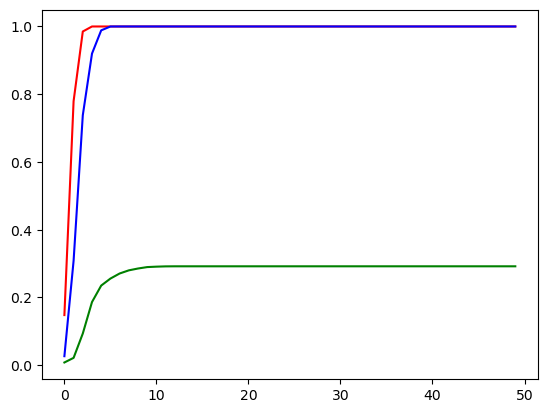

In [10]:

plt.plot([model_curve["threshold_1"][step] for step in range(50)], color='red')
plt.plot([model_curve["threshold_2"][step] for step in range(50)], color='blue')
plt.plot([model_curve["threshold_3"][step] for step in range(50)], color='green')
plt.show()